In [15]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

Keys in the file: ['archive', 'artiq_version', 'datasets', 'expid', 'rid', 'run_time', 'start_time']
<KeysViewHDF5 ['beta_index', 'pmt_counts', 'pmt_counts_avg_thresholded']>
<KeysViewHDF5 ['__param__AWG_amplitude', '__param__EIT_cooling', '__param__SDF', '__param__attenuation', '__param__doppler_cooling', '__param__frequency', '__param__misc', '__param__optical_pumping', '__param__qubit', '__param__sideband', '__param__sideband2mode']>
<KeysViewHDF5 ['amp_729_sp', 'amp_729_sp_aux', 'beta_range_us', 'num_beta']>
b'{"devarg_override": {}, "log_level": 30, "file": "Vdp_AWG/A2_Displacement_2DWigner_AWG.py", "class_name": "A2_Displace_Wigner_2D_AWG", "arguments": {"DopplerCool_frequency/397_cooling": 212000000.0, "DopplerCool_frequency/866_cooling": 86000000.0, "DopplerCool_frequency/397_far_detuned": 220000000.0, "DopplerCool_attenuation/866": 14.0, "DopplerCool_attenuation/397_far_detuned": 16.0, "DopplerCool_doppler_cooling/cooling_time": 0.003, "DopplerCool_attenuation_397": 23.0, "Sid

Text(0, 0.5, '<z>')

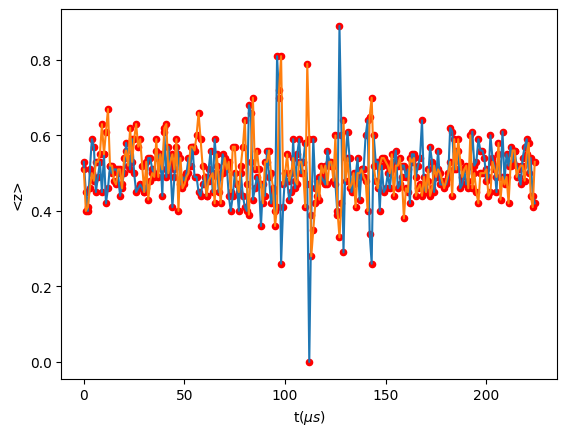

In [16]:
# Path to your .h5 file
file_path_re = '../results/2024-11-20/11/000035099-A2_Displace_Wigner_2D_AWG.h5'
file_path_im = '../results/2024-11-20/12/000035103-A2_Displace_Wigner_2D_AWG.h5'
#27408-A2_Displace_Wigner_2D.h5'
#4_Vdp_Wigner_2D.h5'
#-A2_Displace_Wigner_2D.h5'
#-A4_Vdp_Wigner_2D.h5'

# Open the .h5 file in read mode
with h5py.File(file_path_re, 'r') as file:
    # Print the names of the groups/datasets in the file
    print("Keys in the file:", list(file.keys()))
    
    # Assuming there's a dataset named 'data' in the file
    # Modify this part according to your file's structure
    data = file['datasets']
    print(file['datasets'].keys())

    print(file['archive'].keys())
    print(file['archive']['__param__SDF'].keys())

    print(file['expid'][()])


    rabi_t= data['beta_index'][:]
    pmt_count_re=data['pmt_counts_avg_thresholded'][:]


with h5py.File(file_path_im, 'r') as file:
    # Print the names of the groups/datasets in the file
    print("Keys in the file:", list(file.keys()))
    
    # Assuming there's a dataset named 'data' in the file
    # Modify this part according to your file's structure
    data = file['datasets']
    print(file['datasets'].keys())

    print(file['archive'].keys())
    print(file['archive']['__param__SDF'].keys())

    print(file['expid'][()])


    rabi_t= data['beta_index'][:]
    pmt_count_im=data['pmt_counts_avg_thresholded'][:]

plt.figure()
plt.plot(rabi_t, pmt_count_re)
plt.plot(rabi_t, pmt_count_im)
plt.scatter(rabi_t, pmt_count_re,c='red',s=20)
plt.scatter(rabi_t, pmt_count_im,c='red',s=20)
plt.xlabel('${\\rm t}(\mu s)$')
plt.ylabel('<z>')





In [17]:
pmt_count_re=pmt_count_re.reshape(int(np.sqrt(len(pmt_count_re))),int(np.sqrt(len(pmt_count_re))))
pmt_count_im=pmt_count_im.reshape(int(np.sqrt(len(pmt_count_im))),int(np.sqrt(len(pmt_count_im))))
#pmt_count[pmt_count<0.2]=np.nan

In [18]:
eta=0.134
Rabi_readout=0.0324*2*np.pi
beta_time_range_us = 80

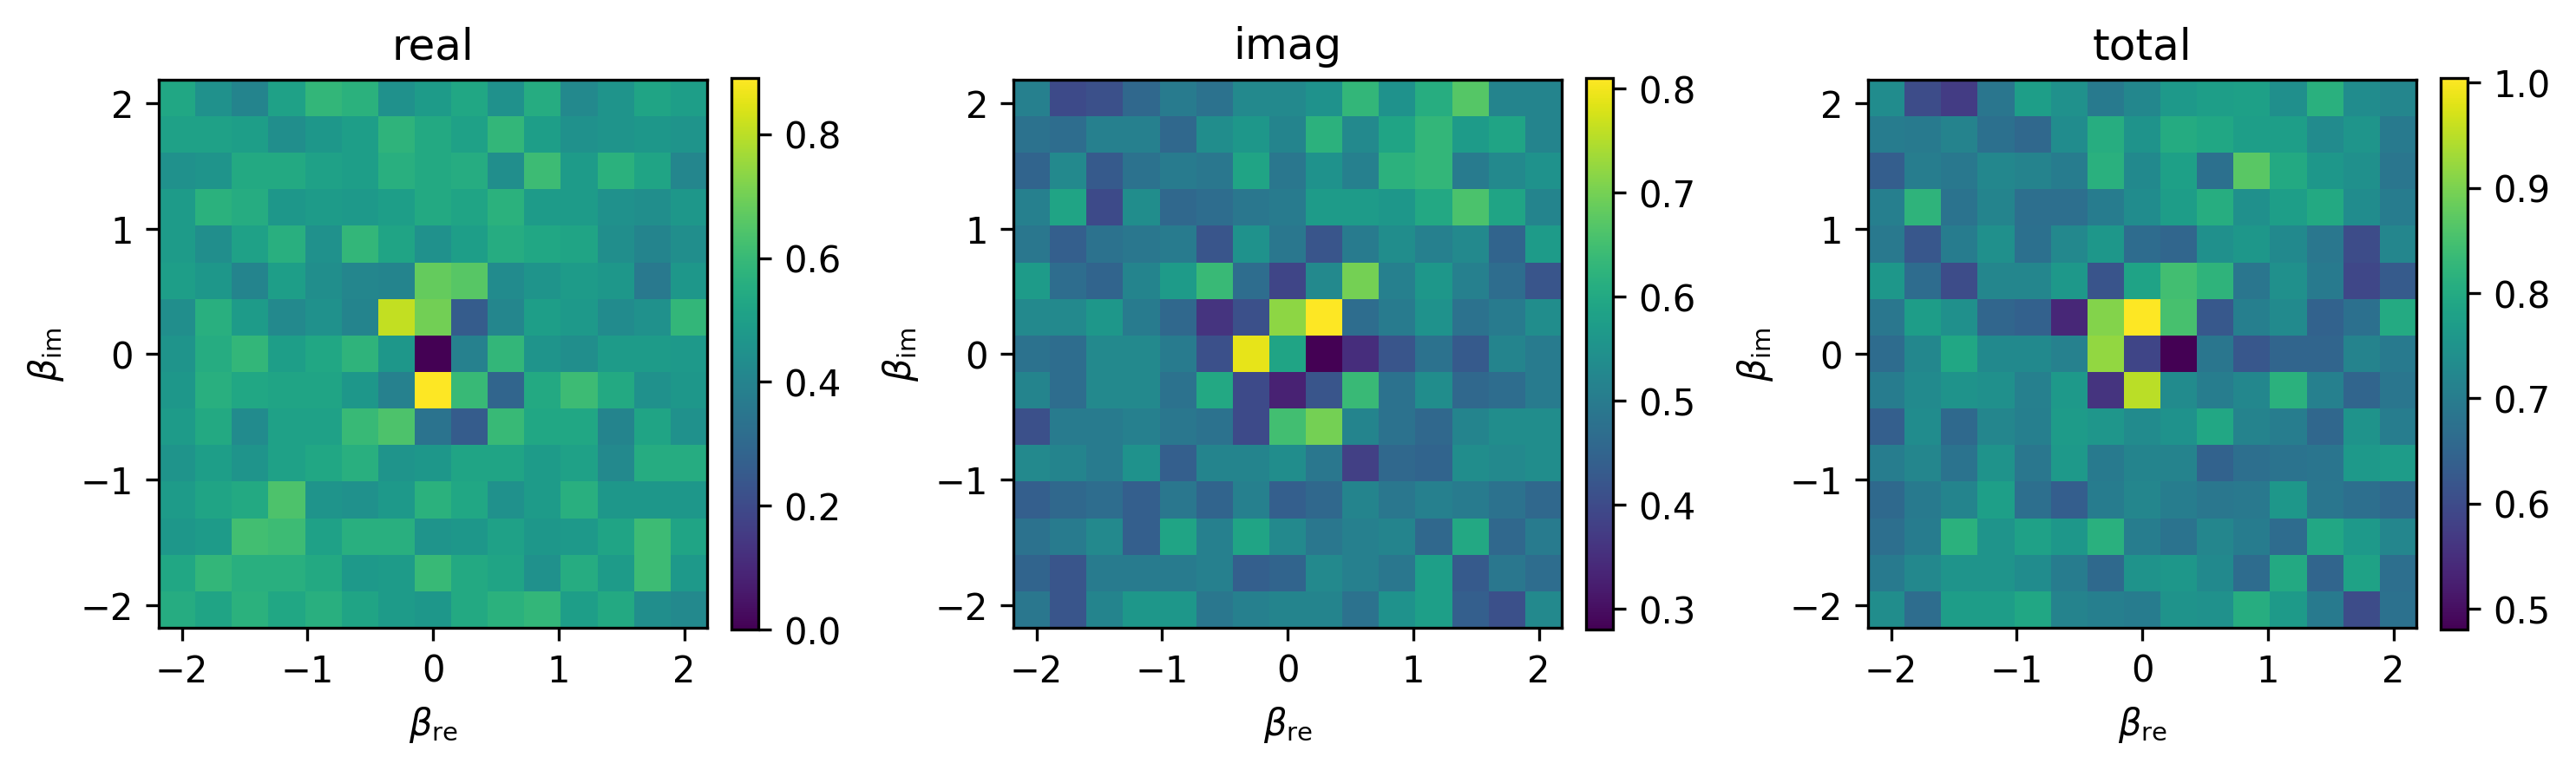

In [19]:
import matplotlib.colors as mcolors
cmap = plt.cm.viridis  # You can choose any colormap
cmap = cmap.copy()     # Copy the colormap to modify it
cmap.set_bad(color='gray')  # Set NaN values to gray

beta_range=eta*Rabi_readout*beta_time_range_us

# Create a figure with 2 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5),dpi=300)

# Plot the first image
im1 = ax1.imshow(pmt_count_re, cmap='viridis', extent=[-beta_range,beta_range,-beta_range,beta_range])
ax1.title.set_text('real')
ax1.set_xlabel('$\\beta_{\\rm re}$')
ax1.set_ylabel('$\\beta_{\\rm im}$')
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)   # Add a colorbar to the first subplot

#Plot the second image
im2 = ax2.imshow(pmt_count_im, cmap='viridis', extent=[-beta_range,beta_range,-beta_range,beta_range])
ax2.title.set_text('imag')
ax2.set_xlabel('$\\beta_{\\rm re}$')
ax2.set_ylabel('$\\beta_{\\rm im}$')
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)   # Add a colorbar to the second subplot

#Plot the second image
im3 = ax3.imshow(np.abs(pmt_count_re+1.0j*pmt_count_im), cmap='viridis', extent=[-beta_range,beta_range,-beta_range,beta_range])
ax3.title.set_text('total')
ax3.set_xlabel('$\\beta_{\\rm re}$')
ax3.set_ylabel('$\\beta_{\\rm im}$')
fig.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)  # Add a colorbar to the second subplot

# Show the plot
plt.tight_layout()  # Adjust layout to fit elements

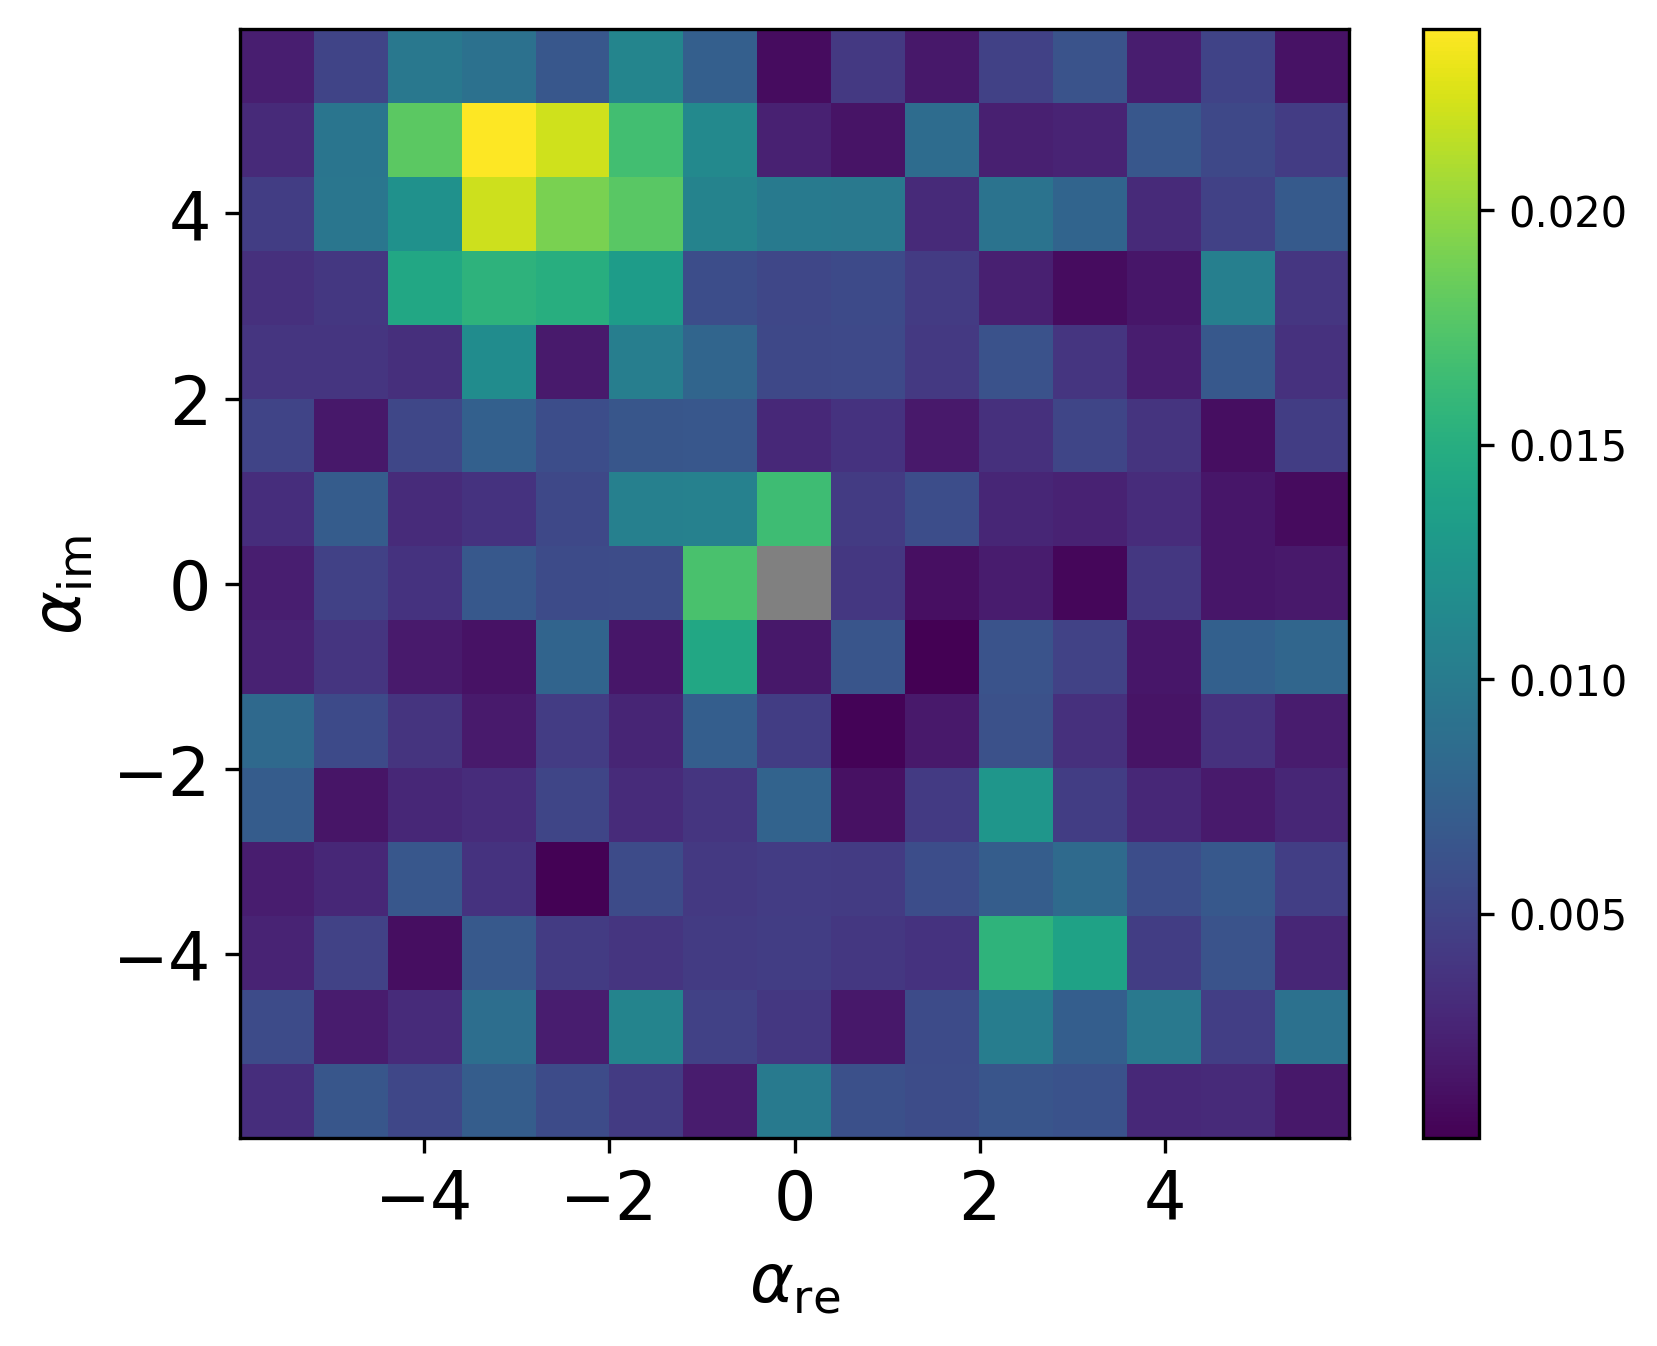

In [20]:
pmt_count_tmp=pmt_count_re+1.0j*pmt_count_im
pmt_count_tmp=np.nan_to_num(pmt_count_tmp, nan=0)
fft_tmp=np.fft.ifft2(pmt_count_tmp)

fft_tmp[0,0]=np.nan

fft_tmp=np.fft.fftshift(fft_tmp)

beta=np.linspace(-beta_range, beta_range, len(pmt_count_re))
alpha=np.fft.fftshift(np.fft.fftfreq(len(beta), beta[1]-beta[0]))*4
# fft_freq=np.fft.fftfreq(len())

plt.figure(dpi=300)
plt.imshow(np.abs(fft_tmp), cmap=cmap,extent=[alpha[0], alpha[-1], alpha[0], alpha[-1]])

plt.xlabel('$\\alpha_{\\rm re}$',fontsize=16)
plt.ylabel('$\\alpha_{\\rm im}$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()


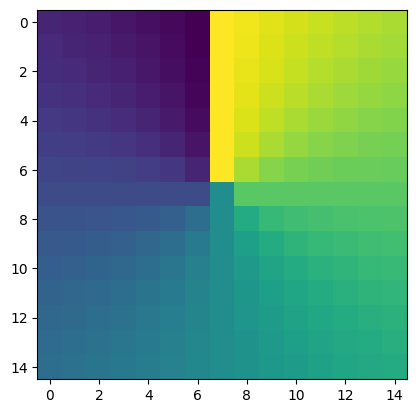

In [21]:

phase=np.loadtxt ('../repository/Vdp/beta_phase.txt')
plt.imshow(phase.reshape(15,15))
